In [11]:
from sympy import sympify, Symbol, sin, cos, log, exp


def validate_prediction(
    skeleton, variables=["x1", "x2", "x3", "x4", "x5"], constant_symbol="C"
):
    local_dict = {var: Symbol(var) for var in variables}
    local_dict[constant_symbol] = Symbol(constant_symbol)

    local_dict.update(
        {
            "sin": sin,
            "cos": cos,
            "log": log,
            "exp": exp,
        }
    )

    try:
        expr = sympify(
            skeleton, locals=local_dict, evaluate=False, convert_xor=True
        )
    except Exception as e:
        return False

    return True

In [ ]:
import re

def expression_to_skeleton(expr):
    """
    Replace any floating point numbers, including those in scientific notation,
    in the given expression with the placeholder "C".
    
    Args:
        expr (str): The input mathematical expression as a string.
    
    Returns:
        str: The transformed expression with placeholders.
    """
    pattern = r'(?<![\w.])(-?\d+(\.\d+)?([eE][-+]?\d+)?)(?![\w.])'
    
    skeleton = re.sub(pattern, "C", expr)
    
    return skeleton

def extract_skeletons_and_errors(filepath, model="SymbolicGPT", valid=True):
    skeletons = []
    errs = []
    with open(filepath, "r") as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            if model in line:
                if valid:
                    if model != "SymbolicGPT":
                        skeleton = expression_to_skeleton(lines[i + 1].strip())
                        if validate_prediction(skeleton):
                            skeletons.append(skeleton)
                            errs.append(float(lines[i + 3].strip()))
                        else:
                            continue
                    else:
                        skeleton = lines[i + 1].strip()
                        if validate_prediction(skeleton):
                            skeletons.append(skeleton)
                            errs.append(float(lines[i + 3].strip()))
                        else:
                            continue
                else:
                    if model != "SymbolicGPT":
                        skeleton = expression_to_skeleton(lines[i + 1].strip())
                        skeletons.append(skeleton)
                    else:
                        skeleton = lines[i + 1].strip()
                        skeletons.append(skeleton)
                    errs.append(float(lines[i + 3].strip()))
                    
                #print(f"Extracted model: {skeletons[-1]}, error: {errs[-1]}")
    
    return skeletons, errs

results  = {}
results["SymbolicGPT"] = {}
skeletons, errs = extract_skeletons_and_errors(r"symbolicGPT\XYE_3Var_500Points_512EmbeddingSize_SymbolicGPT_GPT_PT_EMB_SUM_Skeleton_Padding_200_NOT_VAR_MINIMIZE.txt")
results["SymbolicGPT"]["skeletons"] = skeletons
results["SymbolicGPT"]["errs"] = errs

skeletons, errs = extract_skeletons_and_errors(r"DiffuSym\3_var_set_transformer_ddim_20.txt", "DiffuSym")
results["DiffuSym"] = {}
results["DiffuSym"]["skeletons"] = skeletons
results["DiffuSym"]["errs"] = errs

print(results)

{'SymbolicGPT': {'skeletons': ['C*x1+C*x2+C*exp(C*x1)+C', 'C*sin(C*sin(C*x3+C))+C', 'C*cos(C*x1+C)+C*log(C*x2+C)+C', 'C*sin(C*log(C*x2*x3))+C', 'C*C*x1*x2+C*x3+C', 'C*x3+C', 'C*exp(C*x1)+C', 'C*x1+C*x2+C*log(C*x1+C)+C', 'C*log(C*x1)+C*sin(C*x1)+C', 'C*exp(C/C*x1)/C*sin(C*x2)+C', 'C*exp(C*x2)+C*log(C*x1*x2+C*x1)+C', 'C*exp(C*x2)*C*exp(C*x3)+C', 'C*x1**3+C*x1**2+C*x1+C', 'C*exp(C*cos(C*x1)+C)+C', 'C*sin(C*x1+C)+C', 'C*x1*x3+C*x1+C*x3+C', 'C*x2+C', 'C*exp(C*x2)+C', 'C*x2/(C*x1)+C*x3/(C*x1+C)+C', 'C*exp(C*x2)+C', 'C*x1**2*x3+C*x2+C', 'C*cos(C*x2)+C', 'C*exp(C*x3)+C', 'C*x1+C*x3+C', 'C*x1/(C*x2+C)+C/(C*x2+C)+C', 'C*x1**5*C*log(C*x1+C*x3+C)+C*x1**5+C*x1**4+C*x1**3+C*x1**2+C*x1+C', 'C*log(C*log(C*x2+C*x3+C))+C', 'C*log(C*x2+C)+C', 'C*sin(C*x2)+C*exp(C*x1)+C', 'C*x1+C*x3+C', 'C*x1+C', 'C*x1+C*x2+C*exp(C*x1)+C', 'C*sin(C*x1+C*x3+C)+C', 'C*sin(C*log(C*x1)+C/x1)+C', 'C*x2+C', 'C*x1**5+C*x1**5+C*x1**4+C*x1**3+C*x1**2+C*x1+C', 'C*x1+C*x3+C*sin(C*x3+C)+C', 'C*exp(C*exp(C*cos(C*x2+C)))+C', 'C*x1+C', 

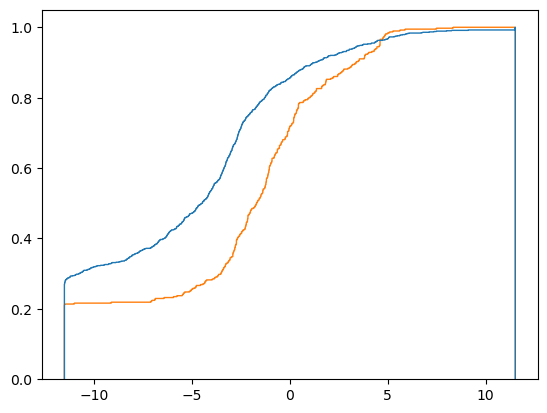

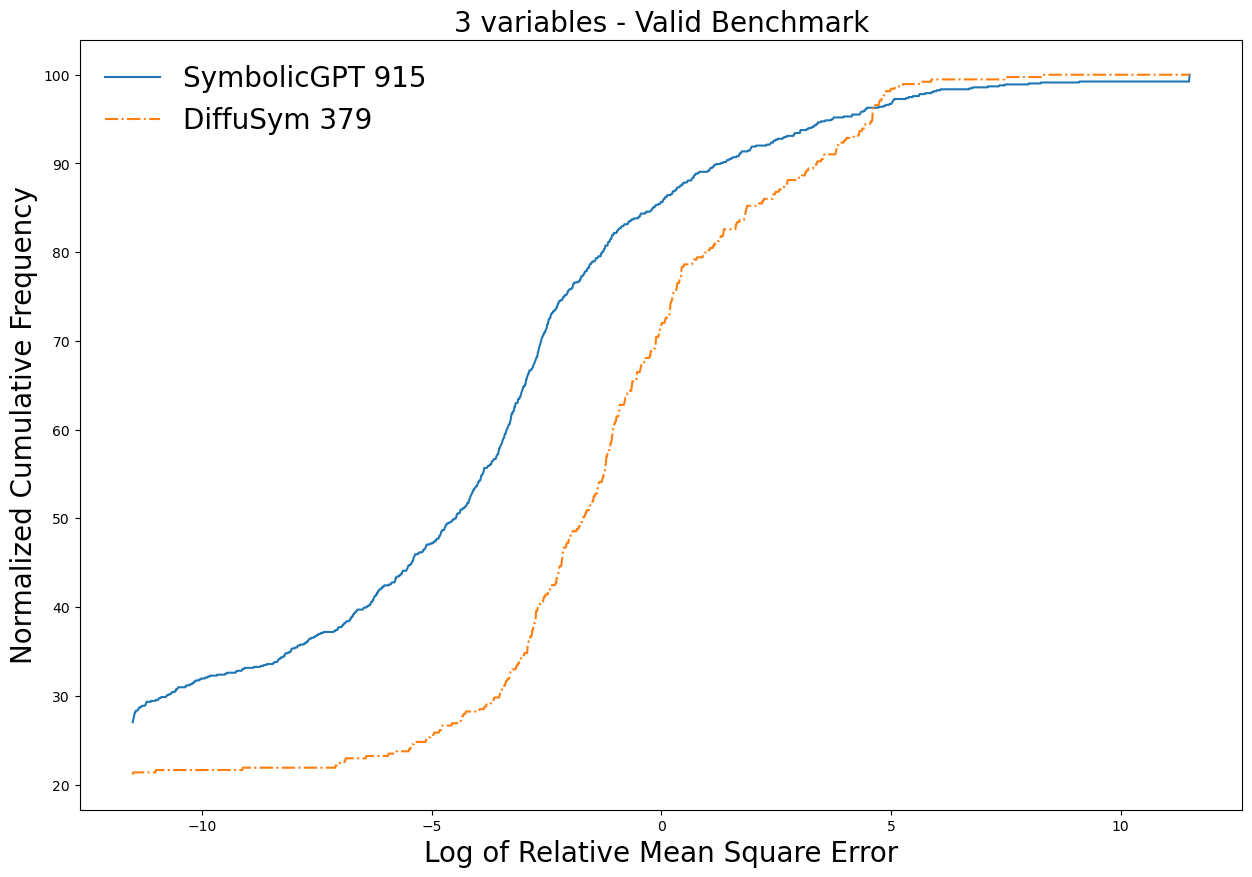

In [170]:
import matplotlib.pyplot as plt
import numpy as np

def plot_and_save_extracted_results(results: dict, fName, num_vars=1, valid=True):
    num_vars = num_vars
    if valid:
        title = f"{num_vars} variables - Valid Benchmark"
    else:
        title = f"{num_vars} variables - Benchmark"

    models = list(results.keys())
    lists_of_error_scores = [results[model]["errs"] for model in models]
    linestyles = ["-","dashdot","dotted","--"]
    
    eps = 0.00001
    y, x, _ = plt.hist([np.log([max(min(x+eps, 1e5),1e-5) for x in e]) for e in lists_of_error_scores],
                    label=models,
                    cumulative=True,
                    histtype="step",
                    bins=2000,
                    density=True,
                    log=False)
    #y = np.expand_dims(y,0)
    plt.figure(figsize=(15, 10))

    for idx, m in enumerate(models):
        plt.plot(x[:-1],
            y[idx] * 100,
            linestyle=linestyles[idx],
            label=f"{m} {len(results[m]['skeletons'])}",),
            

    plt.legend(loc="upper left", fontsize=20, frameon=False)
    plt.title(title, fontdict={"fontsize": 20})
    plt.xlabel("Log of Relative Mean Square Error", fontdict={"fontsize": 20})
    plt.ylabel("Normalized Cumulative Frequency", fontdict={"fontsize": 20})
    
    # Save the plot
    if valid:
        name = f"{fName}_valid.png"
    else:
        name = f"{fName}.png"
    plt.savefig(name)
    plt.show()
    

plot_and_save_extracted_results(results, r"Figures/20/3_var", num_vars=3, valid=True)
